In [52]:
import numpy as np 
import pandas as pd 
import seaborn  as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from help import find_file 

In [5]:
data  = pd.read_csv(find_file("placement.csv"))

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data['cgpa'],data['package'])


In [41]:
x_train =  np.array(x_train).reshape(-1,1)
y_train  =  np.array(y_train).reshape(-1,1)

## We have used the loss function but mathematically it is MSE (mean squared error) $$\sum_{i=0}^{i=n} d^2 $$

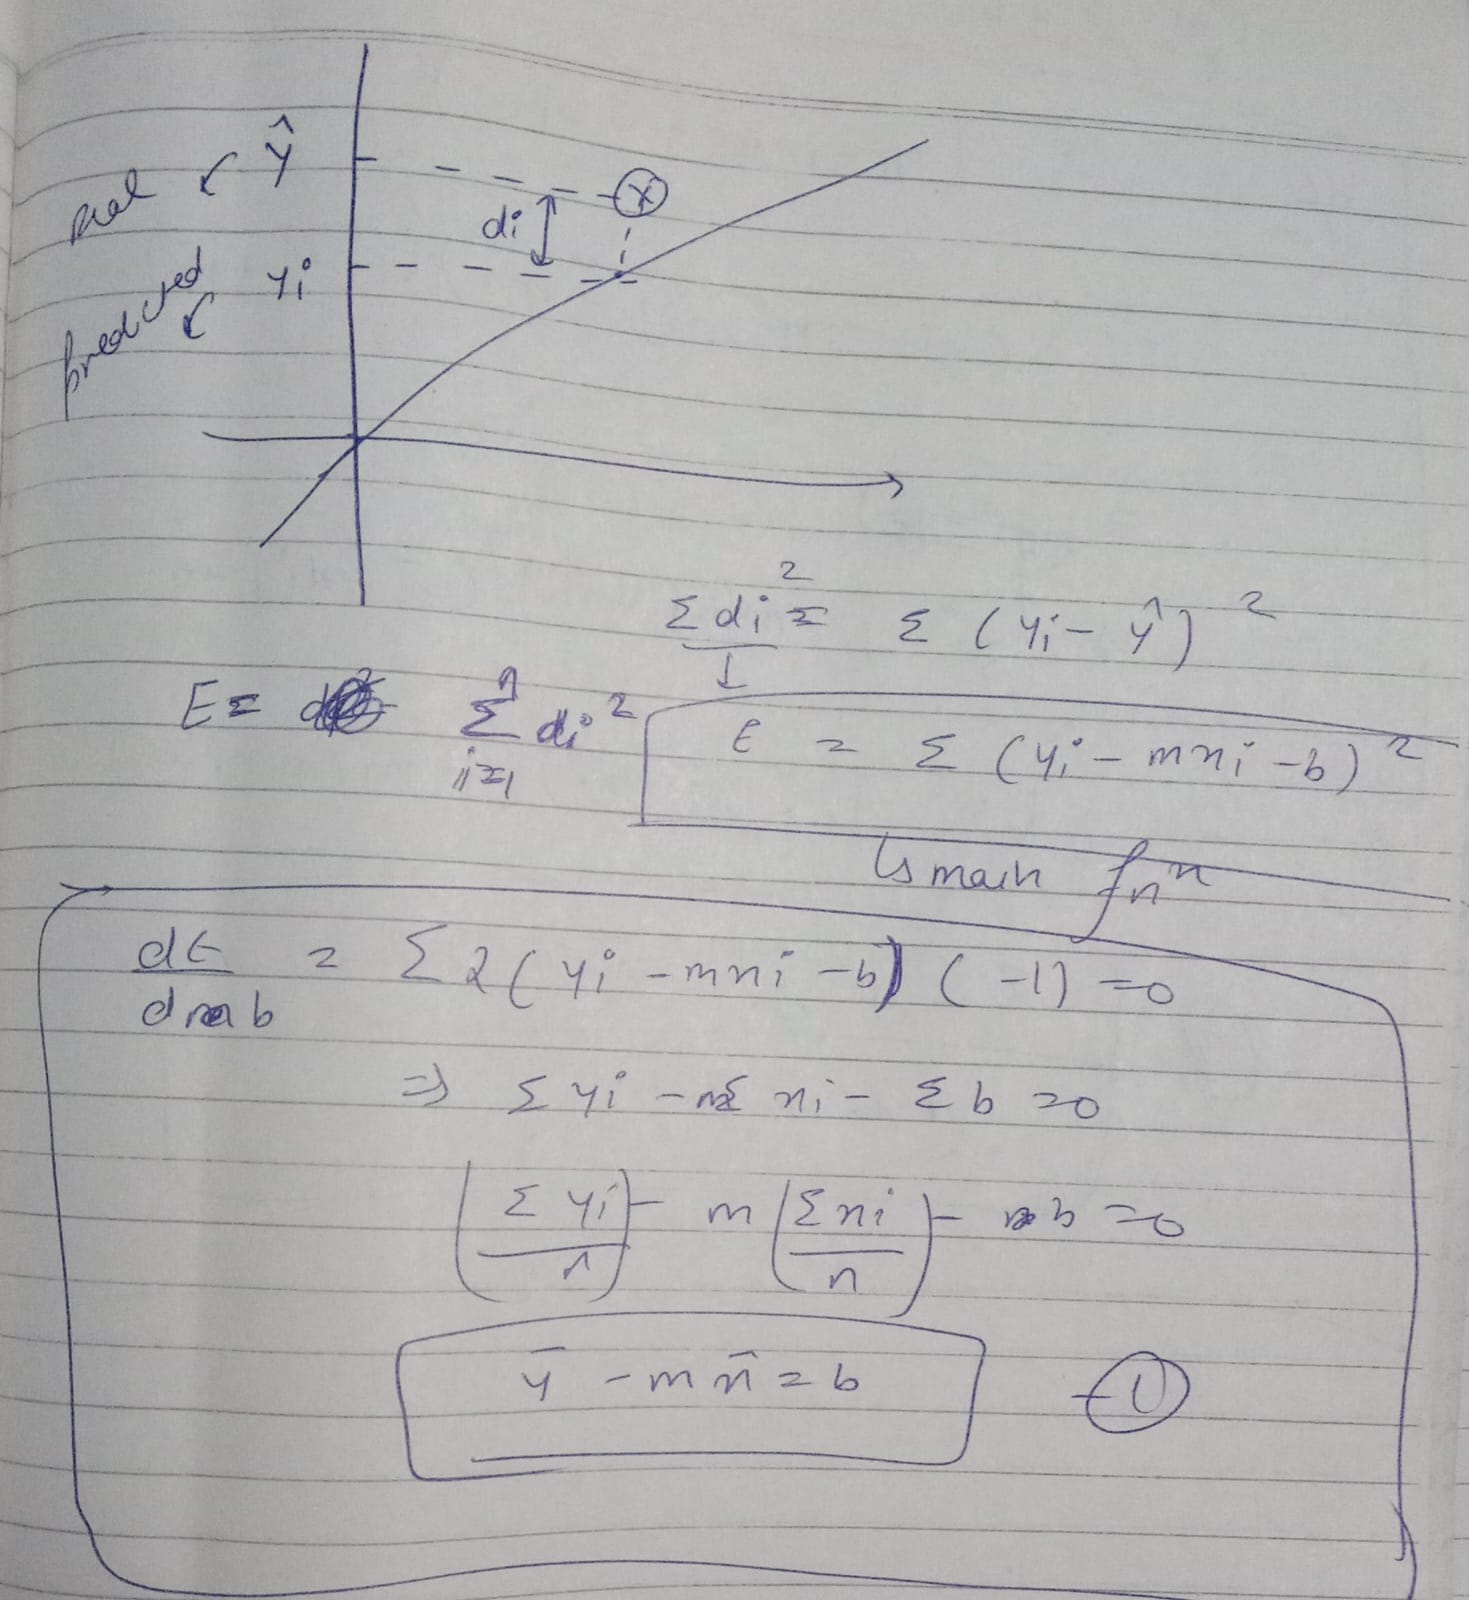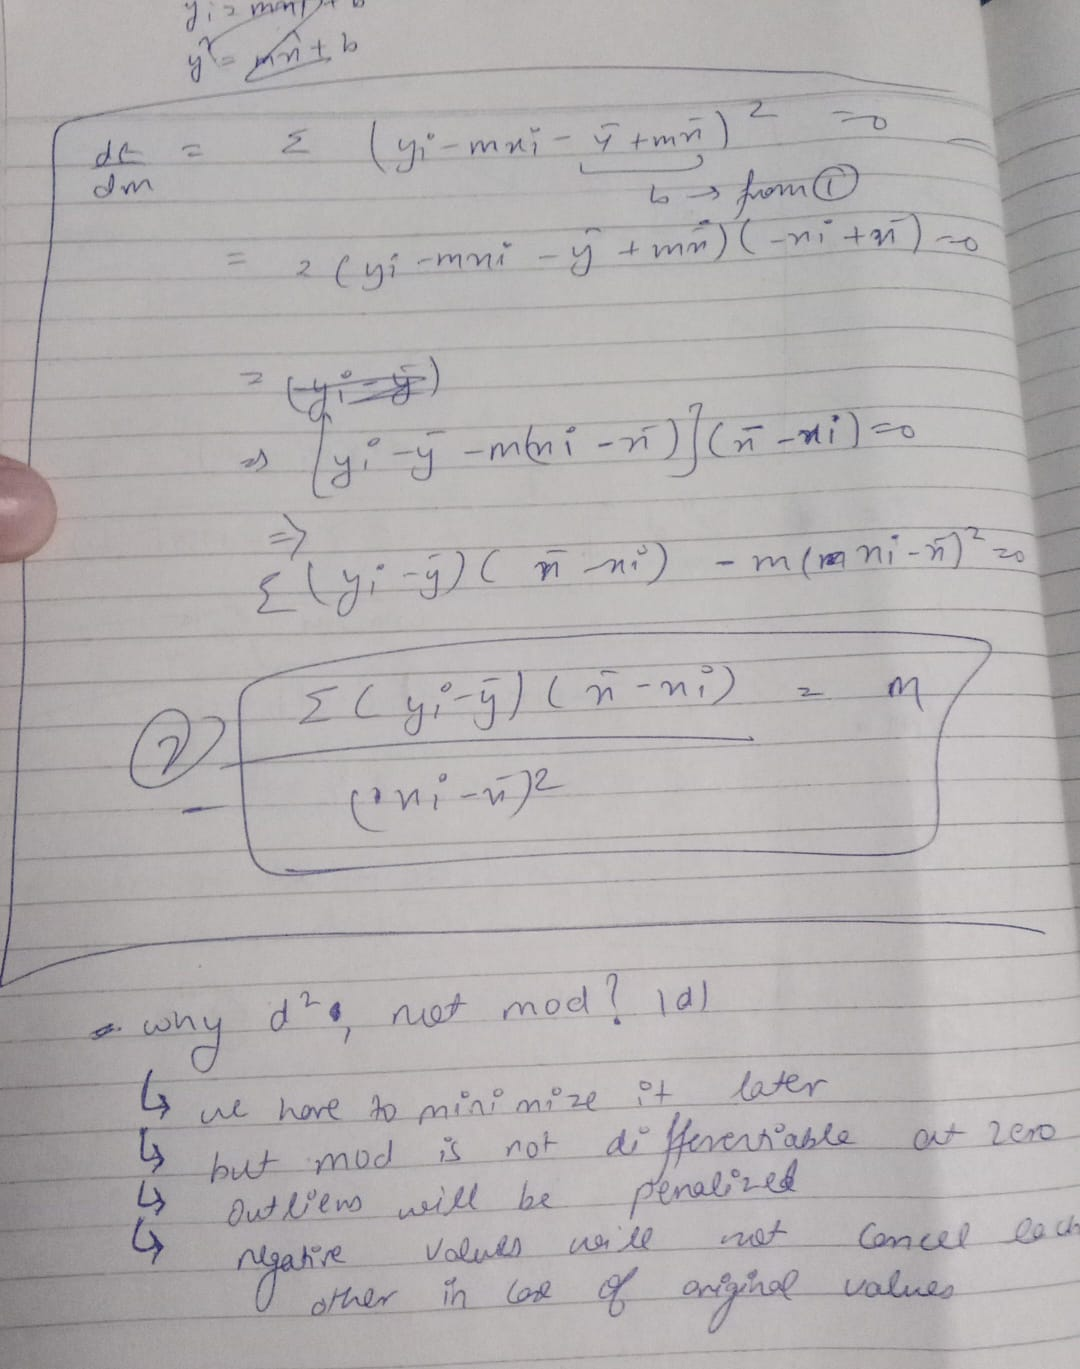

### My Model 


In [43]:
class simple_Lr:

    def fit(self,x,y):
        x_mean  =  np.mean(x)
        y_mean =  np.mean(y)
        num =0 
        den  = 0
        for i in range(x.shape[0]):
            num  =   num +  (x_mean -  x[i])*(y_mean - y[i])
            den =  den  + (x_mean -  x[i])**2
        self.m  =  num/den 
        self.b  = y_mean  - (self.m  * x_mean)
    def predict(self,x_test):
        return (self.m * x_test) +  self.b 
        
        

In [45]:
model = simple_Lr()
model.fit(x_train,y_train)

In [46]:
model.m,model.b

(array([0.56873549]), array([-0.99129506]))

In [47]:
x_predict = model.predict(x_test)

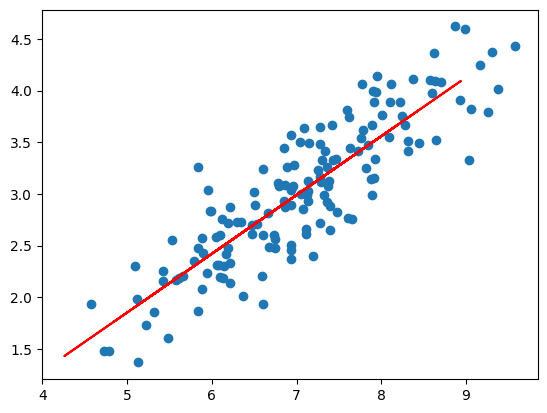

In [56]:
plt.scatter(x_train,y_train)
plt.plot(x_test,x_predict,color='r')

### SkLearn Model 

In [22]:
ori_m  = LinearRegression()
ori_m.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [40]:
ori_m.coef_, ori_m.intercept_

(array([[0.56873549]]), array([-0.99129506]))

In [20]:
y_train.shape

(150,)

In [58]:
x_predicted_ori =  ori_m.predict(np.array(x_test).reshape(-1,1))

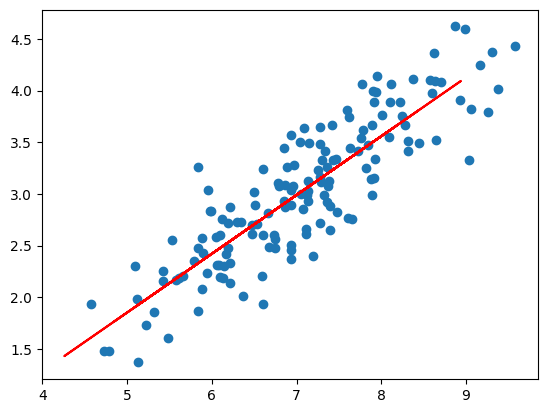

In [59]:
plt.scatter(x_train,y_train)
plt.plot(x_test,x_predicted_ori,color='r')